## 캐글 필사 [주가 예측]

* data 출처: https://www.kaggle.com/datasets/paultimothymooney/stock-market-data/data
* data 설명: Date, Volume, High, Low, Closing Price for NASDAQ, S&P500, NYSE companies
<br> </br> 
* 필사 code 출처: https://www.kaggle.com/code/aadhityaa/stock-market-prediction-using-cnn-lstm

In [1]:
# requirements

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('ggplot')

## NASDAQ, S&P500, NYSE 23.12.07 기준 상위 10 곳

* NASDAQ
  1. Apple (AAPL)
  2. Microsoft (MSFT)
  3. alphabet C (GOOG)
  4. alphabet A (GOOGL)
  5. Amazon.com (AMZN)
  6. Nvidia (NVDA)
  7. Meta (META)
  8. Tesla (TSLA)
  9. Broadcom (AVGO)
  10. ASML holdings (ASML)
<br></br>
* S&P500
  1. Apple (AAPL)
  2. Microsoft (MSFT)
  3. Amazon.com (AMZN)
  4. Nvidia (NVDA)
  5. Alphabet A (GOOGL)
  6. Meta A (META)
  7. Alphabet C (GOOG)
  8. Tesla (TSLA)
  9. Berkshire Hathaway B (BRK.B)
  10. Unitedhealth Group (UNH)
<br></br>
* NYSE
  1. Berkshire Hathaway A (BRK.A)
  2. Berkshire Hathaway B (BRK.B)
  3. Eli Lilly (LLY)
  4. Visa (V)
  5. Unitedhealth Group (UNH)
  6. TSMC ADR (TSM)
  7. JP Morgan Chase (JPM)
  8. Wall Mart (WMT)
  9. ExxonMobil (XOM)
  10. Master Card (MA)

## EDA

In [2]:
# 나스닥 1위인 애플 먼저 분석

data = pd.read_csv('./data/nasdaq/csv/AAPL.csv')

In [3]:
# raw data 확인

display(data.head(), data.tail())

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492


,Date,Low,Open,Volume,High,Close,Adjusted Close
10585,06-12-2022,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
10586,07-12-2022,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
10587,08-12-2022,141.100006,142.360001,62128300,143.520004,142.649994,142.649994
10588,09-12-2022,140.899994,142.339996,76069500,145.570007,142.160004,142.160004
10589,12-12-2022,141.070007,142.699997,21904917,143.000000,142.320007,142.320007


In [4]:
# .info()를 통해 null 값, datatype, data 개수 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10590 non-null  object 
 1   Low             10590 non-null  float64
 2   Open            10590 non-null  float64
 3   Volume          10590 non-null  int64  
 4   High            10590 non-null  float64
 5   Close           10590 non-null  float64
 6   Adjusted Close  10590 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 579.3+ KB


In [5]:
# null 값 재확인

data.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

* null 값이 존재한다면 아래 descriptive statistics에 나오는 mean 값을 넣어 줄 수 있음
```python
data.fillna(data.mean(), inplace=True)
```

In [6]:
# computing descriptive statistics of features using .describe()
# date is object, so it is not computed

data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,10590.000000,10590.000000,1.059000e+04,10590.000000,10590.000000,10590.000000
mean,16.141083,16.323966,3.279584e+08,16.509548,16.332145,15.660952
std,34.495971,34.904787,3.379549e+08,35.327844,34.928490,34.596796
min,0.049107,0.049665,0.000000e+00,0.049665,0.049107,0.038213
25%,0.280134,0.286663,1.215564e+08,0.293699,0.286830,0.237230
50%,0.477500,0.484375,2.151240e+08,0.493304,0.484375,0.401782
75%,15.800536,16.009286,4.070262e+08,16.179196,15.968750,13.831447
max,179.119995,182.630005,7.421641e+09,182.940002,182.009995,180.959747


In [7]:
data.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')

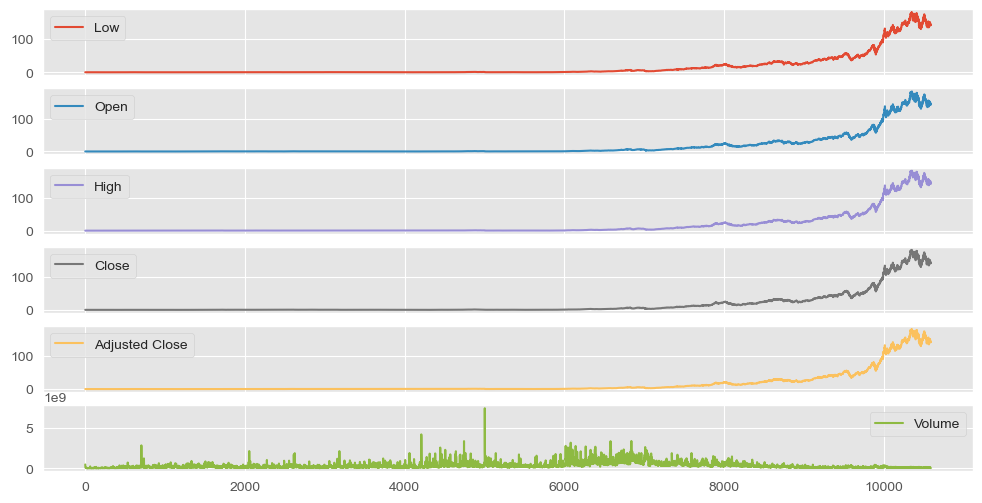

In [8]:
# 거래량 컬럼을 마지막으로 빼고 전체 데이터 확인

col = data.columns.to_numpy()
col = col[[0, 1, 2, 4, 5, 6, 3]]
data = data[col]
data.plot(legend=True, subplots=True, figsize=(12, 6))
plt.show()

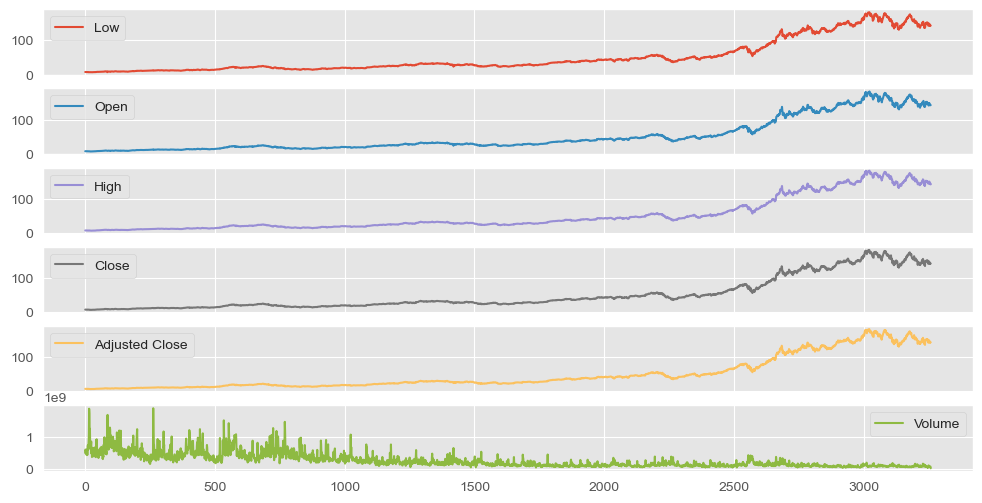

In [9]:
# 데이터가 40년치이기에 최근 10년치로 다시 확인

data_test = data.loc[7331:].reset_index(drop=True)
data_test.plot(legend=True, subplots=True, figsize=(12, 6))
plt.show()

In [10]:
# 이동평균선 생성

ma_day = [5, 10, 20, 60, 120]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean() # .rolling >> 기간 이동 계산 (어떤 열에서, 몇 개를, 어떻게 계산 할 것인지)

In [11]:
data.head()

,Date,Low,Open,High,Close,Adjusted Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 60 days,MA for 120 days
0,12-12-1980,0.128348,0.128348,0.128906,0.128348,0.099874,469033600,NaN,NaN,NaN,NaN,NaN
1,15-12-1980,0.121652,0.122210,0.122210,0.121652,0.094663,175884800,NaN,NaN,NaN,NaN,NaN
2,16-12-1980,0.112723,0.113281,0.113281,0.112723,0.087715,105728000,NaN,NaN,NaN,NaN,NaN
3,17-12-1980,0.115513,0.115513,0.116071,0.115513,0.089886,86441600,NaN,NaN,NaN,NaN,NaN
4,18-12-1980,0.118862,0.118862,0.119420,0.118862,0.092492,73449600,0.11942,NaN,NaN,NaN,NaN


In [12]:
# 백분율 변화 열 생성

data['Daily Return'] = data['Close'].pct_change()
data.head()

,Date,Low,Open,High,Close,Adjusted Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 60 days,MA for 120 days,Daily Return
0,12-12-1980,0.128348,0.128348,0.128906,0.128348,0.099874,469033600,NaN,NaN,NaN,NaN,NaN,NaN
1,15-12-1980,0.121652,0.122210,0.122210,0.121652,0.094663,175884800,NaN,NaN,NaN,NaN,NaN,-0.052171
2,16-12-1980,0.112723,0.113281,0.113281,0.112723,0.087715,105728000,NaN,NaN,NaN,NaN,NaN,-0.073398
3,17-12-1980,0.115513,0.115513,0.116071,0.115513,0.089886,86441600,NaN,NaN,NaN,NaN,NaN,0.024751
4,18-12-1980,0.118862,0.118862,0.119420,0.118862,0.092492,73449600,0.11942,NaN,NaN,NaN,NaN,0.028992


In [13]:
# 이동평균선이나 daily return 때문에 과거 데이터까지 모두 사용한 것이며,
# 드라마틱한 그래프 이동을 보기 위해 5년치만 사용 (2017~2022)

data = data.loc[9093:].reset_index(drop=True)
display(data.head(), data.tail())

,Date,Low,Open,High,Close,Adjusted Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 60 days,MA for 120 days,Daily Return
0,03-01-2017,28.690001,28.950001,29.082500,29.037500,27.174757,115127600,29.1360,29.15450,28.722625,28.365958,27.636292,0.002849
1,04-01-2017,28.937500,28.962500,29.127501,29.004999,27.144337,84472400,29.0740,29.13900,28.809000,28.374125,27.672188,-0.001119
2,05-01-2017,28.952499,28.980000,29.215000,29.152500,27.282377,88774400,29.0665,29.13050,28.892250,28.376458,27.709333,0.005085
3,06-01-2017,29.117500,29.195000,29.540001,29.477501,27.586531,127007600,29.1255,29.15175,28.978250,28.383167,27.747000,0.011148
4,09-01-2017,29.485001,29.487499,29.857500,29.747499,27.839209,134247600,29.2840,29.21925,29.064125,28.390042,27.786833,0.009159


,Date,Low,Open,High,Close,Adjusted Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 60 days,MA for 120 days,Daily Return
1492,06-12-2022,141.919998,147.070007,147.300003,142.910004,142.910004,64727200,146.738000,146.844000,146.825498,146.786499,150.885833,-0.025370
1493,07-12-2022,140.000000,142.190002,143.369995,140.940002,140.940002,69721100,145.320001,145.920001,146.897498,146.571499,150.976500,-0.013785
1494,08-12-2022,141.100006,142.360001,143.520004,142.649994,142.649994,62128300,144.188000,145.078000,147.286498,146.360499,151.068916,0.012133
1495,09-12-2022,140.899994,142.339996,145.570007,142.160004,142.160004,76069500,143.058002,144.483000,147.050999,146.190332,151.121333,-0.003435
1496,12-12-2022,141.070007,142.699997,143.000000,142.320007,142.320007,21904917,142.196002,144.293001,146.681999,146.050666,151.179416,0.001126


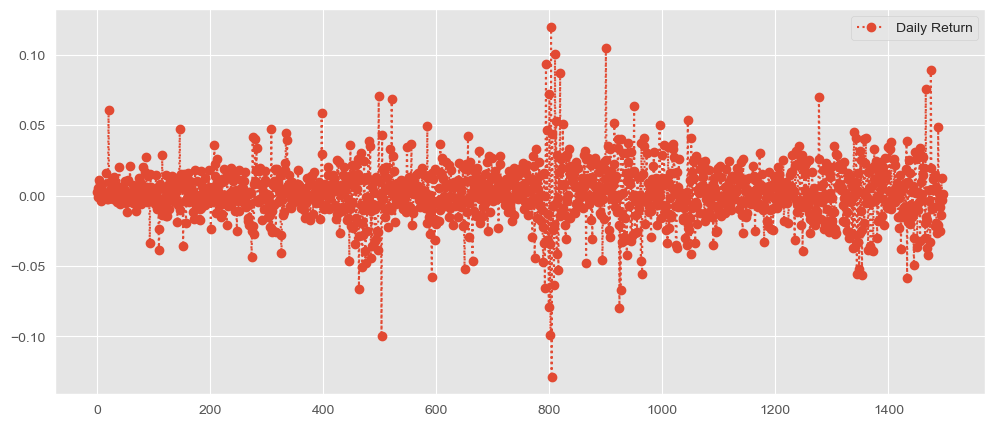

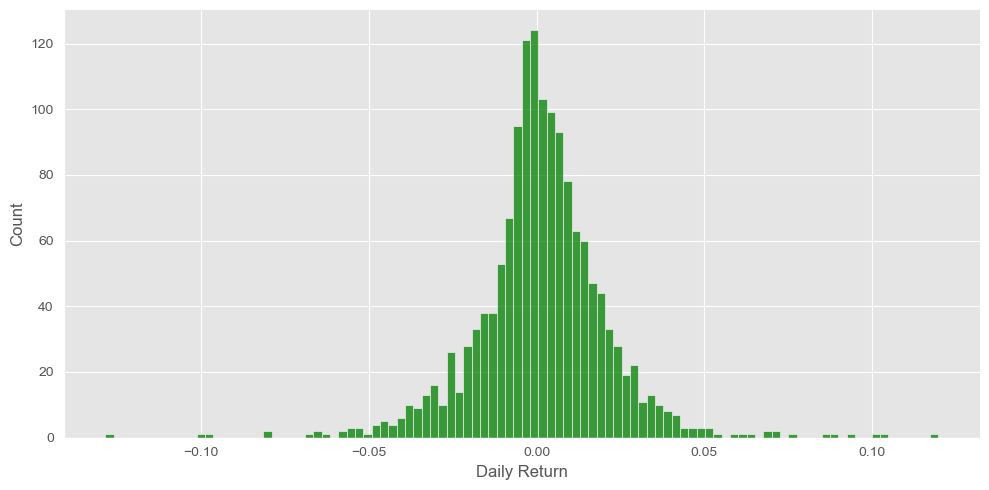

In [73]:
# 백분율 변화 그래프로 확인

# 1. timestamp 따라 변화 확인
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')

# 2. 변화의 분포 확인
sns.displot(data['Daily Return'].dropna(),bins=100,color='green', aspect=2) # 혹시 있을 Nan값 때문에, dropna()로 없애주고 표시
plt.show()

In [15]:
date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

,Date,data_close
0,03-01-2017,29.037500
1,04-01-2017,29.004999
2,05-01-2017,29.152500
3,06-01-2017,29.477501
4,09-01-2017,29.747499


In [16]:
data.nunique()

Date               1497
Low                1442
Open               1439
High               1426
Close              1439
Adjusted Close     1478
Volume             1492
MA for 5 days      1493
MA for 10 days     1492
MA for 20 days     1497
MA for 60 days     1496
MA for 120 days    1497
Daily Return       1495
dtype: int64

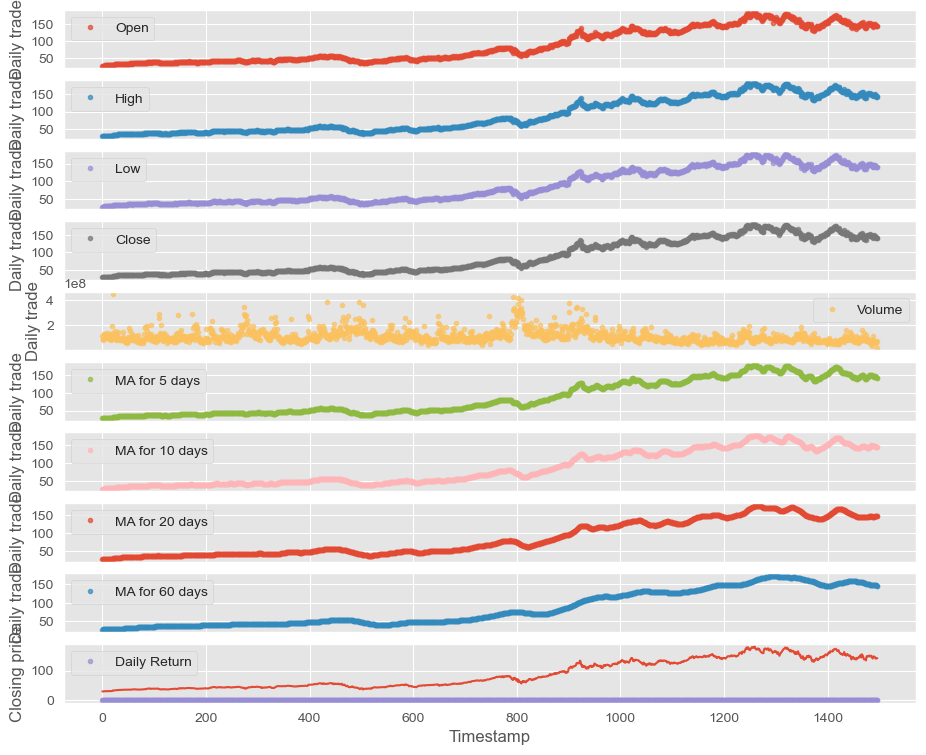

In [17]:
# 전체 열 그래프로 확인

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 5 days','MA for 10 days','MA for 20 days','MA for 60 days', 'Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.show()

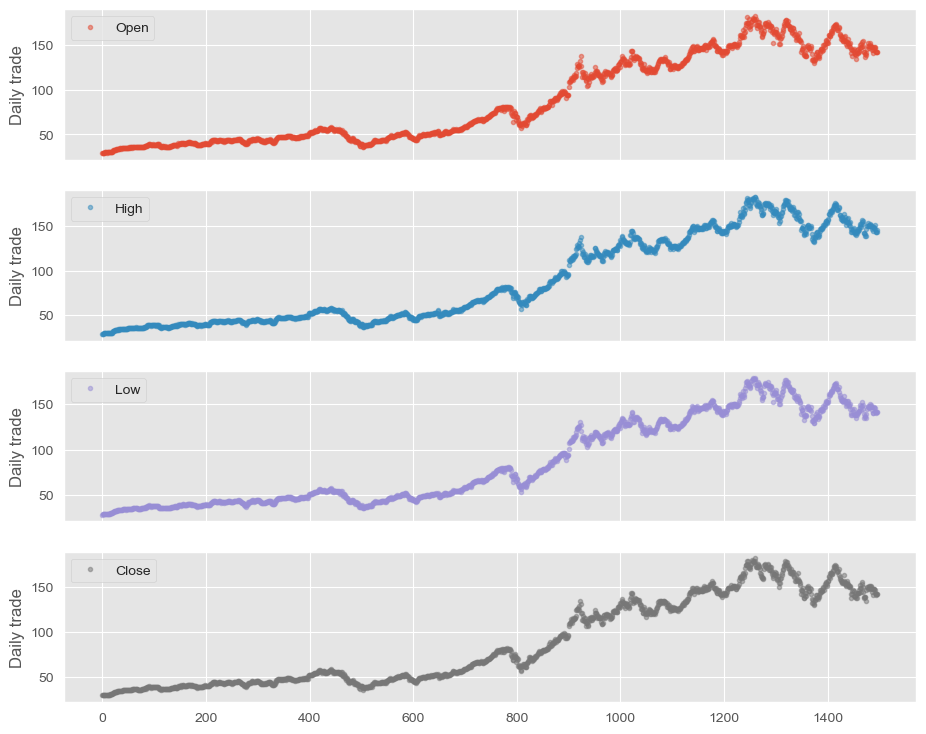

In [18]:
# 최초 데이터인 시가, 고가, 저가, 종가 dot 그래프로 확인

cols_plot = ['Open', 'High', 'Low', 'Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

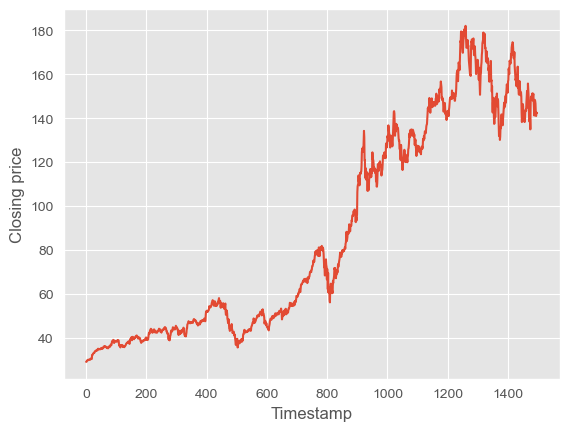

In [19]:
# 종가만 그래프로 확인

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

plt.show()

In [20]:
data.describe().applymap('{:,.2f}'.format).transpose() # 소수점 2째자리 까지만 보이도록 .applymap 적용

,count,mean,std,min,25%,50%,75%,max
Low,"1,497.00",86.60,47.27,28.69,43.61,65.53,133.77,179.12
Open,"1,497.00",87.58,47.92,28.95,43.81,65.94,135.76,182.63
High,"1,497.00",88.61,48.56,29.08,44.28,66.84,137.07,182.94
Close,"1,497.00",87.64,47.94,29.00,43.88,66.39,135.37,182.01
Adjusted Close,"1,497.00",86.22,48.37,27.14,42.13,65.05,134.60,180.96
Volume,"1,497.00","115,711,370.29","53,768,445.93","21,904,917.00","80,576,300.00","101,729,600.00","134,322,000.00","447,940,000.00"
MA for 5 days,"1,497.00",87.49,47.91,29.07,43.86,66.10,135.02,179.37
MA for 10 days,"1,497.00",87.30,47.89,29.13,43.77,65.95,135.26,178.33
MA for 20 days,"1,497.00",86.91,47.82,28.72,43.53,65.63,134.06,176.40
MA for 60 days,"1,497.00",85.33,47.55,28.37,43.14,63.52,130.28,171.37


## 데이터 분할 (training, test)

In [21]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(data) - window_size -1 , 1):
    first = data.iloc[i,2] # open 값 이용
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((data.iloc[i + j, 2] - first) / first)
    temp2.append((data.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1)) # CNN 작동을 위해 [100, 1] shape으로 변경
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True) # 8:2 분할

# 여러 개의 어레이로 나뉘어져 있는 것을 합치는 과정
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

1116
279


## Training

In [22]:
# 모델 생성 및 학습
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# CNN과 LSTM을 활용한 Bi-LSTM 모델 사용

# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
28/28 [==============================] - 9s 63ms/step - loss: 0.0258 - mse: 0.0258 - mae: 0.1122 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0826
Epoch 2/40
28/28 [==============================] - 0s 13ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0803 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0695
Epoch 3/40
28/28 [==============================] - 0s 13ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0712 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0610
Epoch 4/40
28/28 [==============================] - 0s 13ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0661 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0659
Epoch 5/40
28/28 [==============================] - 0s 13ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0651 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0536
Epoch 6/40
28/28 [==============================] - 0s 13ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0644 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0521
Epoch 7/40
28/28 [====

In [23]:
# history 내 key 이용하여 그래프를 만들 예정이므로 key 확인

history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

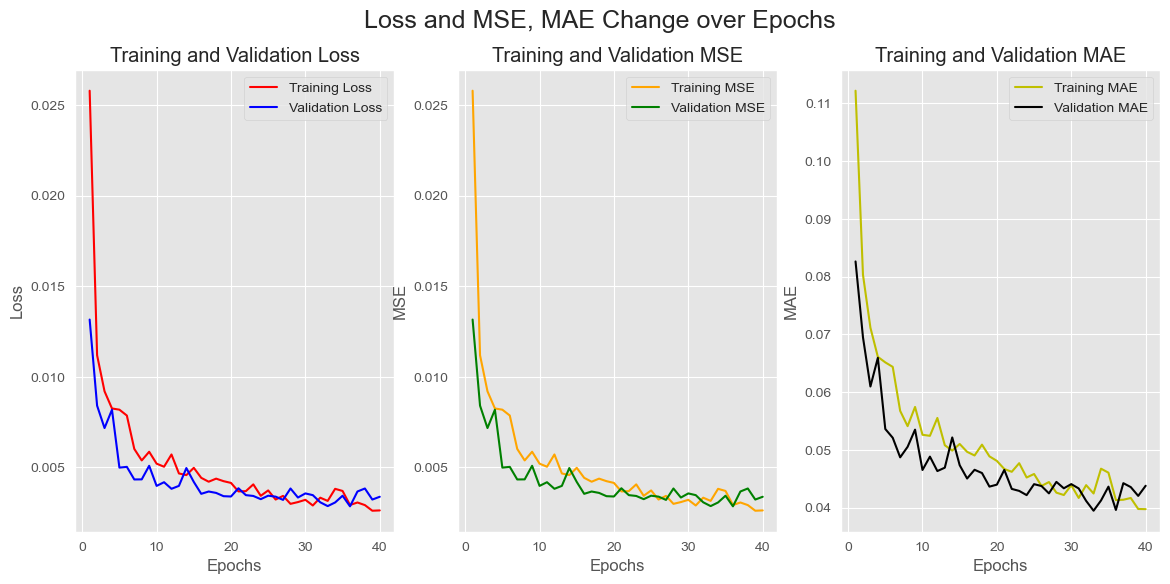

In [24]:
# loss, mse, mae check on graphs

history_dict = history.history
mse = history_dict['mse']
val_mse = history_dict['val_mse']
mae = history_dict['mae']
val_mae = history_dict['val_mae']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

fig.suptitle('Loss and MSE, MAE Change over Epochs', fontsize=18)

ax1.plot(epochs, loss, 'r', label = 'Training Loss')
ax1.plot(epochs, val_loss, 'b', label = 'Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set(xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epochs, mse, 'orange', label = 'Training MSE')
ax2.plot(epochs, val_mse, 'g', label = 'Validation MSE')
ax2.set_title('Training and Validation MSE')
ax2.set(xlabel='Epochs', ylabel='MSE')
ax2.legend()

ax3.plot(epochs, mae, 'y', label = 'Training MAE')
ax3.plot(epochs, val_mae, 'k', label = 'Validation MAE')
ax3.set_title('Training and Validation MAE')
ax3.set(xlabel='Epochs', ylabel='MAE')
ax3.legend()

plt.show()

In [25]:
# summarizing model

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

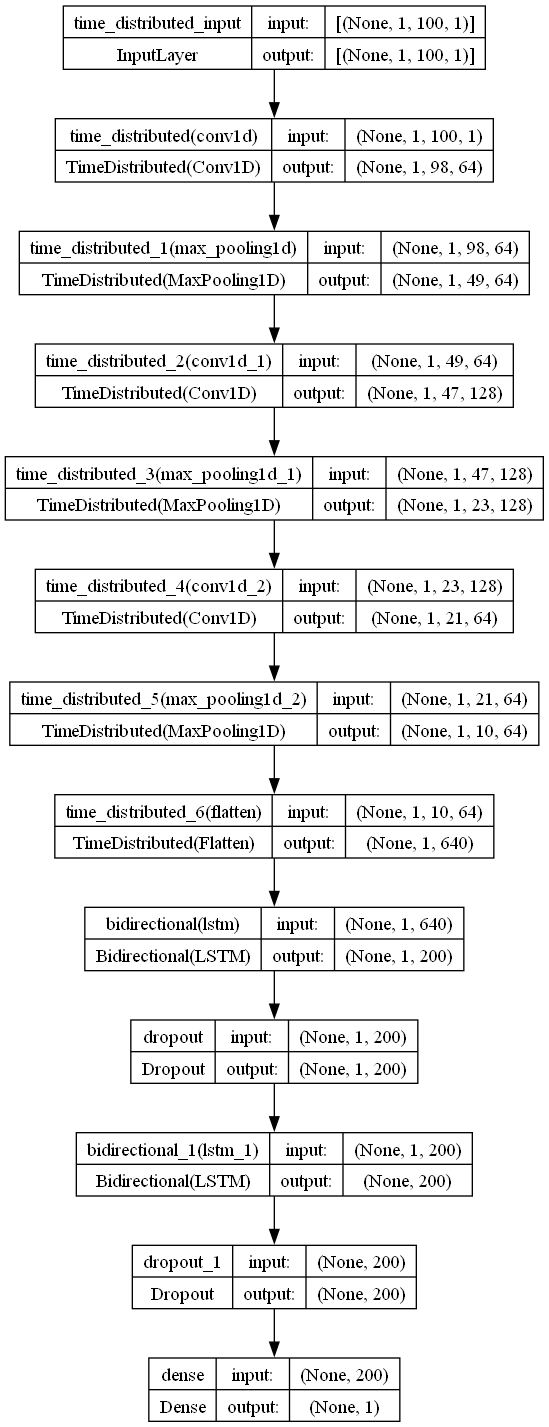

In [26]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 
# plot_model 사용하려면 pydot (pip), graphviz (web, path 세팅 필수) 다운로드 후 재부팅 필요

In [27]:
# evaluation

model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 10ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0438


[0.0033744906540960073, 0.0033744906540960073, 0.04379644989967346]

In [28]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# test set 확률 prediction
yhat_probs = model.predict(test_X, verbose=0)

# 1d array로 변형
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.908499
R2 Score: 0.908499
Max Error: 0.295188


9/9 [==============================] - 0s 4ms/step


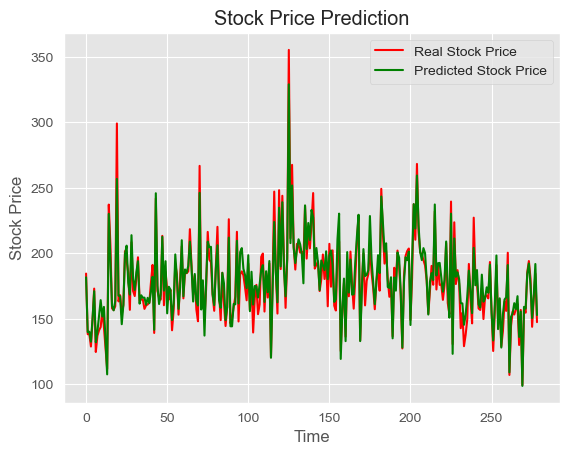

In [65]:
# graph로 예측값과 원래 값 비교

predicted = model.predict(test_X)
test_Y = np.array(y_test) # 추가하지 않으면 test_label 선언에 얕은 복사가 되어 test_Y 값까지 변함
test_label = test_Y.reshape(-1, 1)
predicted = np.array(predicted[:, 0]).reshape(-1, 1)
len_t = len(train_X)

for j in range(len_t, len_t + len(test_X)):
    temp = data.iloc[j, 4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.plot(predicted, color ='green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [66]:
# model save

model.save('model.h5')

In [67]:
# load model

l_model = tf.keras.models.load_model('./model.h5')
l_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

## 결론

1. daily return 등의 추가적인 지표는 생성하였으나 이는 딥러닝에 사용되지 않음
<br></br>
2. 또한 보통의 time series forecasting 처럼 가격만 사용하였음 (다른 지표의 영향 등이 배제되었음)
   - 이 경우, 앞서 진행한 preprocessing이나 analysis는 모두 의미가 없게됨.
<br></br>
3. 위에 기재되지 않은 추가적인 EDA에서는 COVID 기간 전후로 데이터를 나누어 상관관계를 보았는데, 부족함이 있음
   - 상관관계만 보지 않고 추가적인 것들을 확인하나 내용 미약
<br></br>
4. 만들어진 모델을 다른 데이터에 적용하여 train 시킨 결과는 x 축으로 이동된 데이터가 생성됨 (시계열 예측에서 가장 최악의 경우)
   - 예측이 어려워서 후반영하거나 선반영하는 경우인데, 주식 시장에서 활용도가 낮음
<br></br>
5. 그러나 단순 숫자에 CNN과 LSTM을 활용하여 최초 생성한 모델은 꽤나 정교하게 따라가는 모습을 보이며, <br>
   추가적인 parameter 수정은 없기에 모델 구성과 train, test 데이터 생성에 대해서는 계속 공부할 필요 있겠음

In [69]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2989631241992498378
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6284115968
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12877283988263415734
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:26:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
